7.62918783 51.95400748 7.65293855 51.95982125
len(biglinestring) 82
len(line_segments) 81
ele is not a valid column in input nodes. Ignoring this column.
timestamp is not a valid column in input nodes. Ignoring this column.
sat is not a valid column in input nodes. Ignoring this column.


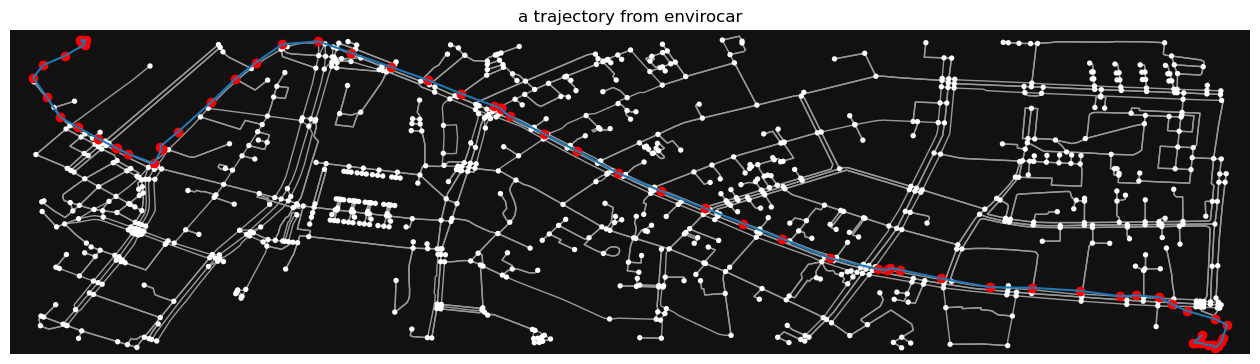

In [1]:
import requests
import json

import pandas as pd
import geopandas as gpd
from shapely.geometry import shape, Point
import osmnx as ox
import networkx as nx

from algorithms import mm_utils

def plot_trajectory(trajectory, title = None):
    '''
    Plot trajectory points.
    Args:
        trajectory: a GeoDataFrame object which represents trajectory points.
        title: the title of the plot
    '''
    # Get the bounding box
    bbox = gdf.total_bounds

    # 'total_bounds' returns a tuple with (minx, miny, maxx, maxy) values
    minx, miny, maxx, maxy = bbox
    
    # Download a map by specifying the bounding box, and draw the graph
    try:
        G = ox.graph.graph_from_bbox(maxy, miny, maxx, minx, network_type='all_private') # The order is north, south, east, west [https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_bbox]
    except ValueError as e:
        print(e)
        return
    fig, ax = ox.plot_graph(G, figsize = (16,16), show=False, close=False)
    
    # Set the title of ax
    ax.set_title(title)

    # Draw the trajectory edges
    tripdata_edges = mm_utils.point_to_traj(gdf, columns = {'ele': 'average',
                                                                      'timestamp':'first',
                                                                      'sat':'first'})
    tripdata_edges.plot(ax=ax, linewidth=1.5)

    # Draw the trajectory points
    gdf.plot(ax=ax, color='red')

    # Draw the whole plot in the campus!
    campus = ox.features.features_from_place('Somewhere', tags = {'name':True})
    campus.plot(ax = ax, alpha=0.5)

# Download trajectory data from envirocar
url = "https://envirocar.org/api/stable/tracks/52f3836be4b0d8e8c27ed6f0"
response = requests.get(url)
data = json.loads(response.text)

# Convert the trajectory data into a GeoDataFrame
geometries = []
attributes = []
for feature in data['features']:
    geometry = shape(feature['geometry'])
    geometries.append(geometry)
    attributes.append(feature['properties'])

gdf = gpd.GeoDataFrame(data=attributes, geometry=geometries)

plot_trajectory(gdf, 'a trajectory from envirocar')

121.01209035646006 24.791077377540198 121.01469451822177 24.79284026334341
len(biglinestring) 667
len(line_segments) 666
ele is not a valid column in input nodes. Ignoring this column.
timestamp is not a valid column in input nodes. Ignoring this column.
sat is not a valid column in input nodes. Ignoring this column.
skipped https://www.openstreetmap.org/trace/8487895/data
121.4581209545197 25.041455087578605 121.46526673513526 25.04455188611084
len(biglinestring) 1755
len(line_segments) 1754
ele is not a valid column in input nodes. Ignoring this column.
timestamp is not a valid column in input nodes. Ignoring this column.
sat is not a valid column in input nodes. Ignoring this column.
152.98980378455943 -27.425311601327287 152.98981421756574 -27.425309304163456
Found no graph nodes within the requested polygon
skipped https://www.openstreetmap.org/trace/8487892/data
-121.92044581796253 36.57554178110925 -121.81361990877865 36.66954097892182
len(biglinestring) 6000
len(line_segments) 

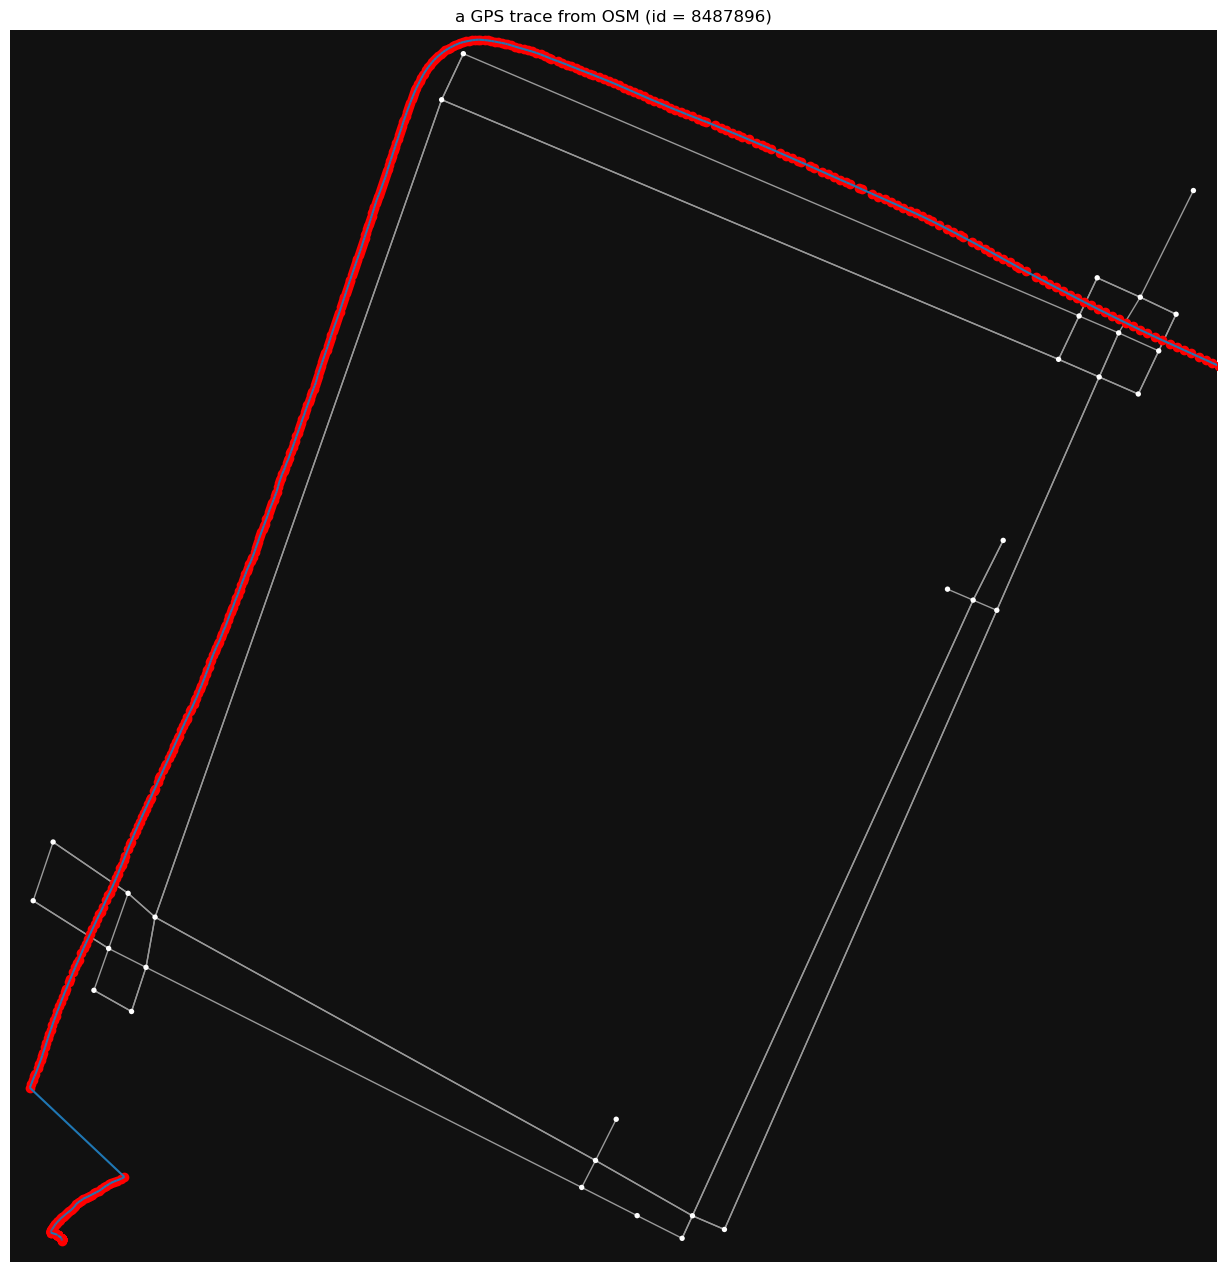

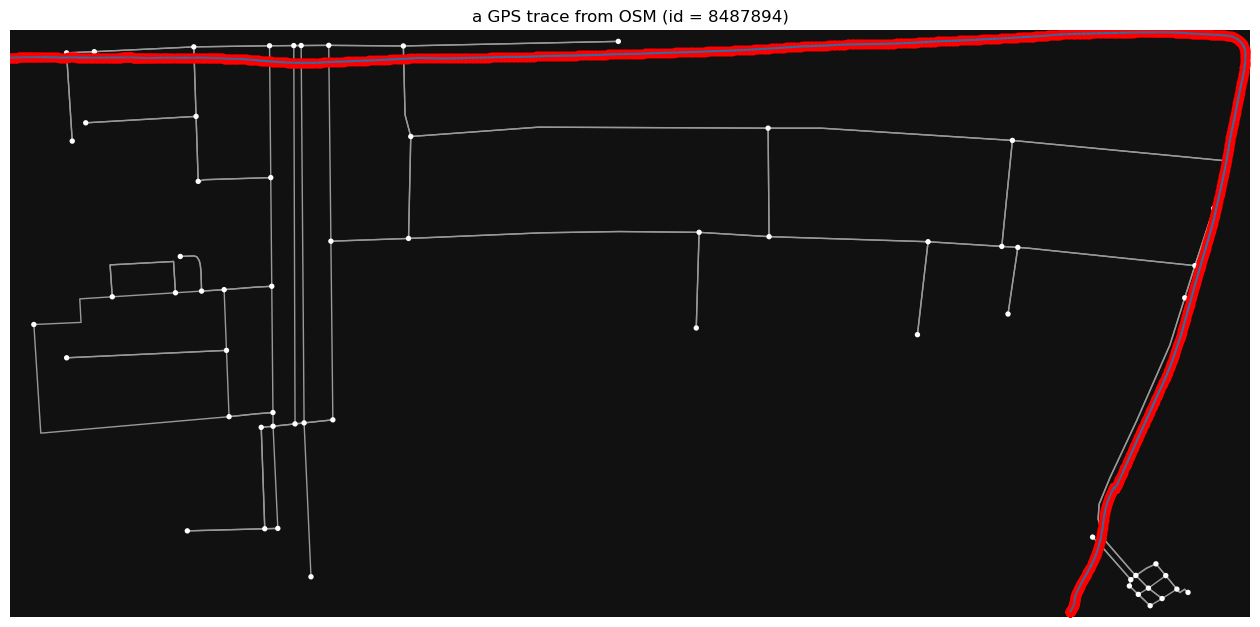

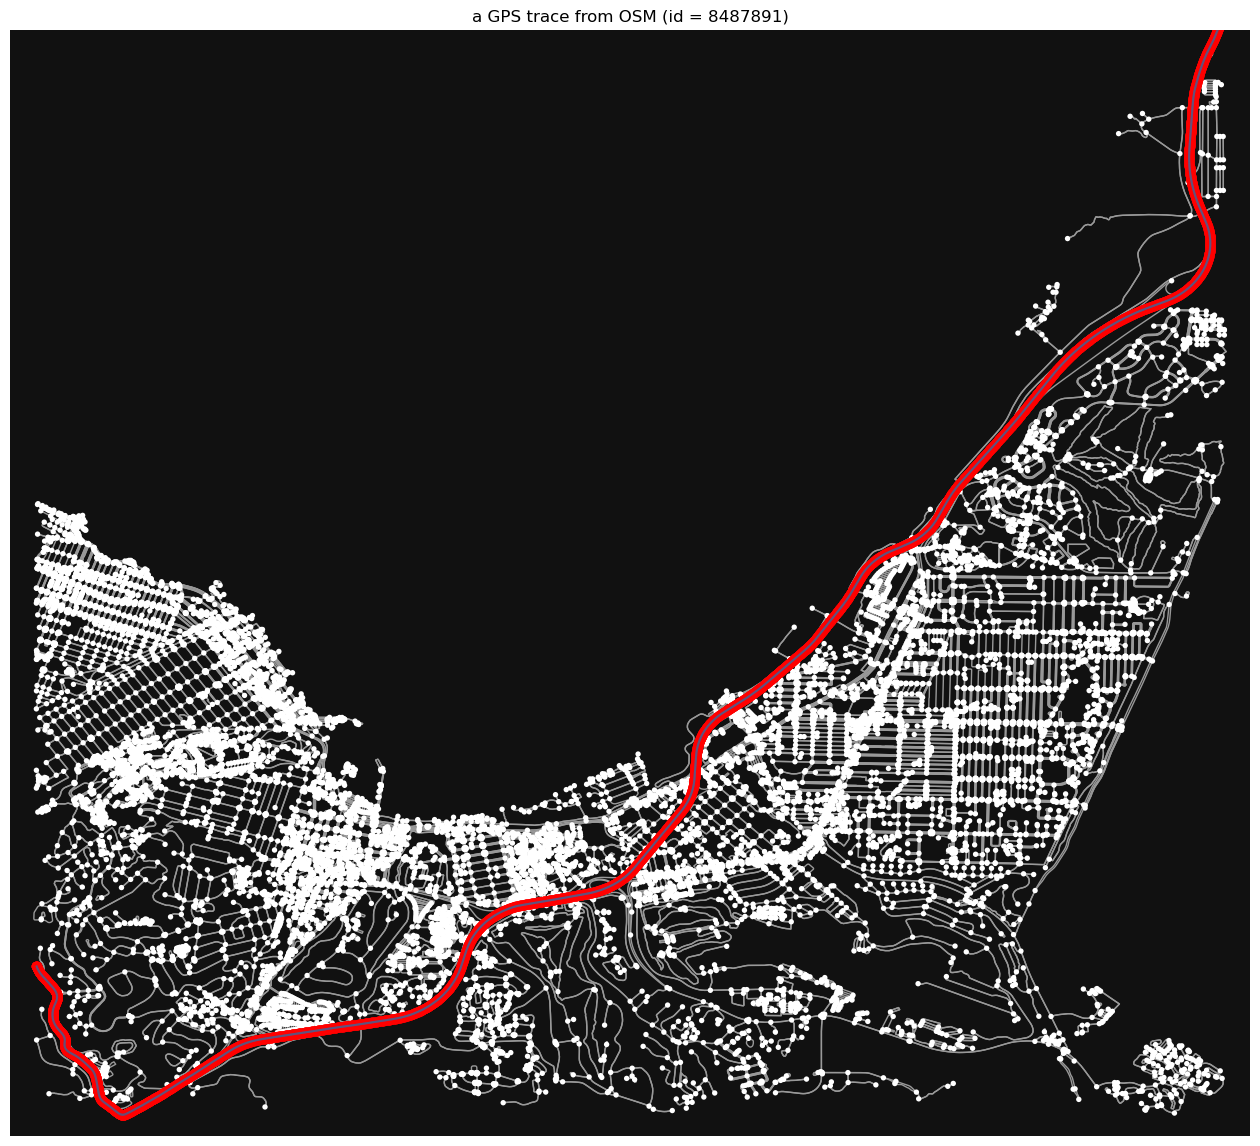

In [2]:
import urllib.parse
import xml.etree.ElementTree as ET

import gpxpy
import gpxpy.gpx

latest_id = 8487896
base_url = "https://www.openstreetmap.org/trace/"
num_of_retrieved_traces = 8
for i in range(num_of_retrieved_traces):
    id = latest_id - i
    url = urllib.parse.urljoin(base_url, f'{id}/data')
    response = requests.get(url)
    if response.status_code != 200:
        print(f'skipped {url}')
        continue
    
    gpx = gpxpy.parse(response.text)

    data = {
        'geometry': [],
        'time': [],
        'elevation': []
    }
    for segment in gpx.tracks[0].segments:
        for p in segment.points:
            data['geometry'].append(Point(p.longitude, p.latitude))
            data['time'].append(p.time)
            data['elevation'].append(p.elevation)
    gdf = gpd.GeoDataFrame(data = data, geometry = 'geometry')
    
    plot_trajectory(gdf, f'a GPS trace from OSM (id = {id})')